# Example of BackTrader using Minute Data

### Import some libraries first

In [1]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import backtrader as bt
import datetime
import backtrader.feeds as btfeeds
import my_util
import backtrader.analyzers as btanalyzers
from backtrader.feeds import GenericCSVData

Using TensorFlow backend.


### This is to just make plot large

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

### get_project_information, is just a dict which contains all the paths and etc.You can have direct paths in code

In [3]:
Experiment_details = my_util.get_project_information()

Project Details : 
{'epoch': 10, 'base_path': '/Users/gauravtyagi/Desktop/BitBucket/Financial_Projects/finance_analysis_june_2018', 'number_of_items_in_feature': 30, 'data_path': '/data/IBM_adjusted.txt', 'results_path': '/results/', 'window_size': 1, 'Experiment_name': 'Experiment_v_1'}


### Thats how the data looks like. Its from a csv.

In [4]:
Data = my_util.get_data(Experiment_details['base_path']+ Experiment_details['data_path'])

First 5 rows of Data : 
         Date   Time   Open   High    Low  Close  Volume
0  01/02/1998  09:30  38.69  38.69  38.69  38.69  180976
1  01/02/1998  09:31  38.64  38.69  38.64  38.64   29172
2  01/02/1998  09:32  38.66  38.69  38.64  38.69   35925
3  01/02/1998  09:33  38.66  38.69  38.64  38.64   45379
4  01/02/1998  09:34  38.64  38.69  38.64  38.64   12968
Last 5 rows of Data : 
               Date   Time     Open     High      Low    Close  Volume
2020861  06/13/2017  17:33  155.109  155.109  155.109  155.109     251
2020862  06/14/2017  08:00  154.020  154.490  154.020  154.490     600
2020863  06/14/2017  08:15  154.490  154.490  154.490  154.490     500
2020864  06/14/2017  08:30  154.490  154.720  154.250  154.250     459
2020865  06/14/2017  08:35  154.020  154.020  154.000  154.000     267


## Here we start real code for the backtrader

### Define the extra columns if you have. I had buy and sell signal in last column.

In [5]:
class GenericCSV_signal(GenericCSVData):

    # I have last column as buy_sell signal, which is on 7th place
    lines = ('buy_sell',)

    
    params = (('buy_sell', 7),)

### Define the order in which you have your columns. Mine were first Date, Time, O,H,L,C,V,buy_sell

In [6]:
data = GenericCSV_signal(dataname="test_minute_backtest.csv",
                               datetime=0,
                               time = 1,
                               fromdate=datetime.datetime(1998,1,2),
                               todate=datetime.datetime(1998,1,6),
                               open = 2,
                               high=3,
                               low=4,
                               close=5,
                               volume=6,
                                 openinterest=-1,
                               dtformat="%m/%d/%y",
                              tmformat = "%H:%M",
                              timeframe=bt.TimeFrame.Minutes,
                              compression=1)

## This is just a strategy which uses the buy and sell signal (Magically appearedmay be)

1998-01-02, Close, 38.69
1998-01-02, BUY CREATE, 38.69
1998-01-02, SIGNAL WAS, 1.00
1998-01-02, BUY EXECUTED, 38.64
1998-01-02, Close, 38.64
1998-01-02, Close, 38.69
1998-01-02, Close, 38.64
1998-01-02, Close, 38.64
1998-01-02, Close, 38.64
1998-01-02, Close, 38.66
1998-01-02, Close, 38.64
1998-01-02, Close, 38.66
1998-01-02, Close, 38.66
1998-01-02, Close, 38.66
1998-01-02, Close, 38.73
1998-01-02, Close, 38.69
1998-01-02, Close, 38.78
1998-01-02, Close, 38.83
1998-01-02, Close, 38.83
1998-01-02, SELL CREATE, 38.83
1998-01-02, SIGNAL WAS, -1.00
1998-01-02, SELL EXECUTED, 38.78
1998-01-02, Close, 38.80
1998-01-02, Close, 38.80
1998-01-02, Close, 38.78
1998-01-02, Close, 38.83
1998-01-02, Close, 38.78
1998-01-02, Close, 38.78
1998-01-02, Close, 38.73
1998-01-02, Close, 38.71
1998-01-02, Close, 38.69
1998-01-02, Close, 38.71
1998-01-02, Close, 38.71
1998-01-02, Close, 38.66
1998-01-02, Close, 38.69
1998-01-02, Close, 38.69
1998-01-02, Close, 38.66
1998-01-02, Close, 38.69
1998-01-02, Clo

1998-01-05, Close, 39.38
1998-01-05, Close, 39.34
1998-01-05, Close, 39.34
1998-01-05, Close, 39.36
1998-01-05, Close, 39.36
1998-01-05, Close, 39.27
1998-01-05, Close, 39.29
1998-01-05, Close, 39.34
1998-01-05, Close, 39.31
1998-01-05, Close, 39.34
1998-01-05, Close, 39.31
1998-01-05, Close, 39.34
1998-01-05, Close, 39.31
1998-01-05, Close, 39.34
1998-01-05, Close, 39.38
1998-01-05, Close, 39.40
1998-01-05, Close, 39.34
1998-01-05, Close, 39.36
1998-01-05, Close, 39.40
1998-01-05, Close, 39.38
1998-01-05, Close, 39.38
1998-01-05, Close, 39.36
1998-01-05, Close, 39.43
1998-01-05, Close, 39.43
1998-01-05, Close, 39.43
1998-01-05, Close, 39.52
1998-01-05, Close, 39.47
1998-01-05, Close, 39.47
1998-01-05, Close, 39.43
1998-01-05, Close, 39.47
1998-01-05, Close, 39.47
1998-01-05, Close, 39.47
1998-01-05, Close, 39.50
1998-01-05, Close, 39.52
1998-01-05, Close, 39.52
1998-01-05, Close, 39.50
1998-01-05, Close, 39.52
1998-01-05, Close, 39.50
1998-01-05, Close, 39.50
1998-01-05, Close, 39.50


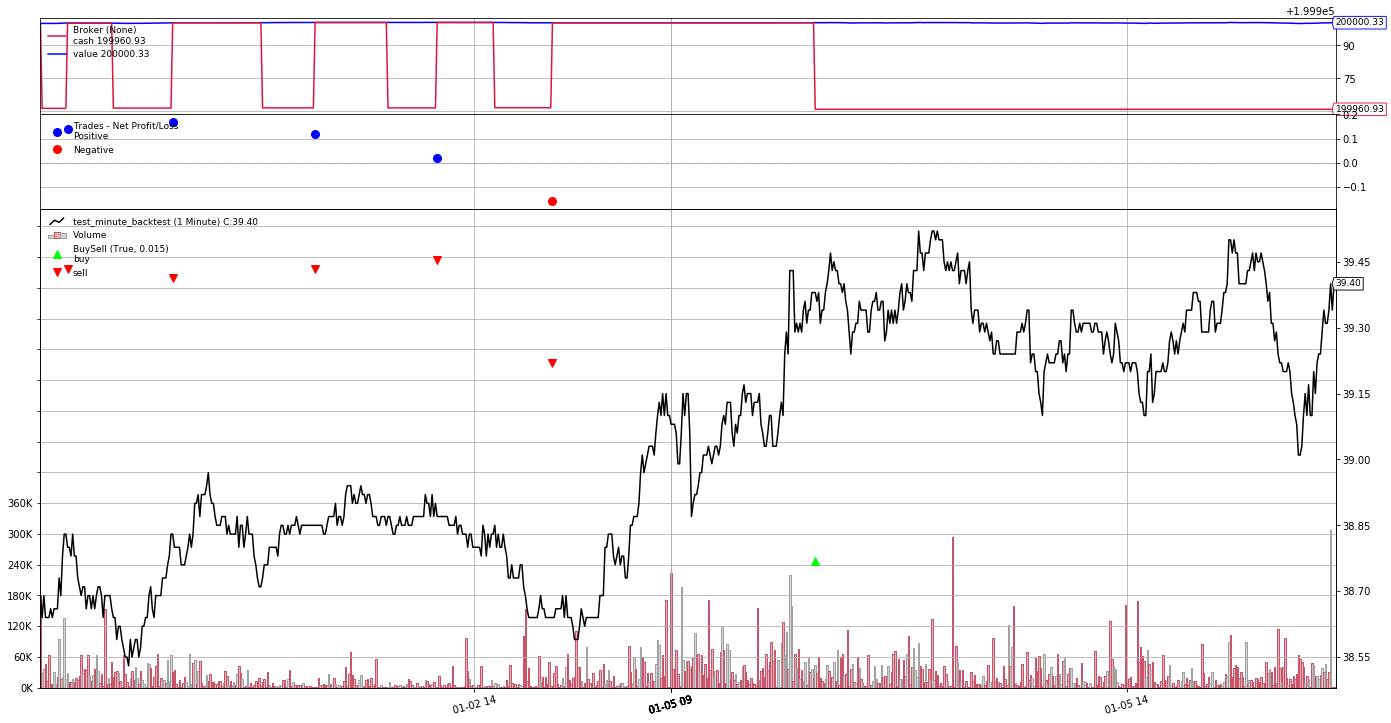

[[<Figure size 1440x720 with 4 Axes>]]

In [11]:
# Create a Stratey
class TestStrategy2(bt.Strategy):

    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))

    def __init__(self):
        # Keep a reference to the "close" line in the data[0] dataseries
        self.dataclose = self.datas[0].close
        self.datasignal = self.datas[0].buy_sell

        # To keep track of pending orders
        self.order = None

    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enougth cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None

    def next(self):
        # Simply log the closing price of the series from the reference
        self.log('Close, %.2f' % self.dataclose[0])

        # Check if an order is pending ... if yes, we cannot send a 2nd one
        if self.order:
            return

        # Check if we are in the market
        if not self.position:

            # Not yet ... we MIGHT BUY if ...
            if self.datasignal== 1:
                # BUY, BUY, BUY!!! (with default parameters)
                self.log('BUY CREATE, %.2f' % self.dataclose[0])
                self.log('SIGNAL WAS, %.2f' % self.datasignal[0])
                # Keep track of the created order to avoid a 2nd order
                self.order = self.buy()

        else:

            # Already in the market ... we might sell
            if self.datasignal == -1:
                # SELL, SELL, SELL!!! (with all possible default parameters)
                self.log('SELL CREATE, %.2f' % self.dataclose[0])
                self.log('SIGNAL WAS, %.2f' % self.datasignal[0])

                # Keep track of the created order to avoid a 2nd order
                self.order = self.sell()






cerebro = bt.Cerebro()
cerebro.adddata(data)
cerebro.broker.setcash(200000.0)




cerebro.addstrategy(TestStrategy2)




cerebro.addanalyzer(btanalyzers.Returns, _name='my_return')
cerebro.addanalyzer(btanalyzers.DrawDown, _name='my_DrawDown')
cerebro.addanalyzer(btanalyzers.SQN, _name='my_SQN')
cerebro.addanalyzer(btanalyzers.Transactions, _name='my_Transactions')
cerebro.addanalyzer(btanalyzers.SharpeRatio, _name='my_SharpeRatio')
cerebro.addanalyzer(btanalyzers.TradeAnalyzer, _name='my_TradeAnalyzer')

results = cerebro.run()
stats = results[0]


#print('Return:', stats.analyzers.my_return.get_analysis())
#print('DrawDown:', stats.analyzers.my_DrawDown.get_analysis())
#print('SQN:', stats.analyzers.my_SQN.get_analysis())
#print('Transactions:', stats.analyzers.my_Transactions.get_analysis())
#print('SharpeRatio:', stats.analyzers.my_SharpeRatio.get_analysis())
#print('TradeAnalyzer:', stats.analyzers.my_TradeAnalyzer.get_analysis())








print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything


    # Print out the final result
print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())



result_dict={
    
    'Return':stats.analyzers.my_return.get_analysis(),
    'DrawDown':stats.analyzers.my_DrawDown.get_analysis(),
    'SQN':stats.analyzers.my_SQN.get_analysis(),
    'Transactions': stats.analyzers.my_Transactions.get_analysis(),
    #'SharpeRatio': stats.analyzers.my_SharpeRatio.get_analysis(),
    'TradeAnalyzer': stats.analyzers.my_TradeAnalyzer.get_analysis()
    
    
}


cerebro.plot(iplot=False)


In [8]:
class PrintTree:
    def printTree(self, tree, d = 0):
        if (tree == None or len(tree) == 0):
            print( "\t" * d)
        else:
            for key, val in tree.items():
                if (isinstance(val, dict)):
                    print( "\t" * d, key,":")
                    self.printTree(val, d+1)
                else:
                    print( "\t" * d, str("---------------------"))
                    print( "\t" * d, key, str(":   ") + str(val))
                    print( "\t" * d, str("---------------------"))

In [9]:
TT = PrintTree()

In [10]:
TT.printTree(result_dict)

 Return :
	 ---------------------
	 rtot :   1.6499986387156776e-06
	 ---------------------
	 ---------------------
	 ravg :   2.159684082088583e-09
	 ---------------------
	 ---------------------
	 rnorm :   2.159684084420701e-09
	 ---------------------
	 ---------------------
	 rnorm100 :   2.159684084420701e-07
	 ---------------------
 DrawDown :
	 ---------------------
	 len :   495
	 ---------------------
	 ---------------------
	 drawdown :   8.499978749238221e-05
	 ---------------------
	 ---------------------
	 moneydown :   0.16999999998370185
	 ---------------------
	 max :
		 ---------------------
		 len :   495
		 ---------------------
		 ---------------------
		 drawdown :   0.000279999299986034
		 ---------------------
		 ---------------------
		 moneydown :   0.5599999999685679
		 ---------------------
 Transactions :
	 ---------------------
	 1998-01-02 09:31:00 :   [[1, 38.64, 0, 'test_minute_backtest', -38.64]]
	 ---------------------
	 ---------------------
	 1998-01